# Extraction of interaction rules from Cytoscape database

In [1]:
import pandas as pd

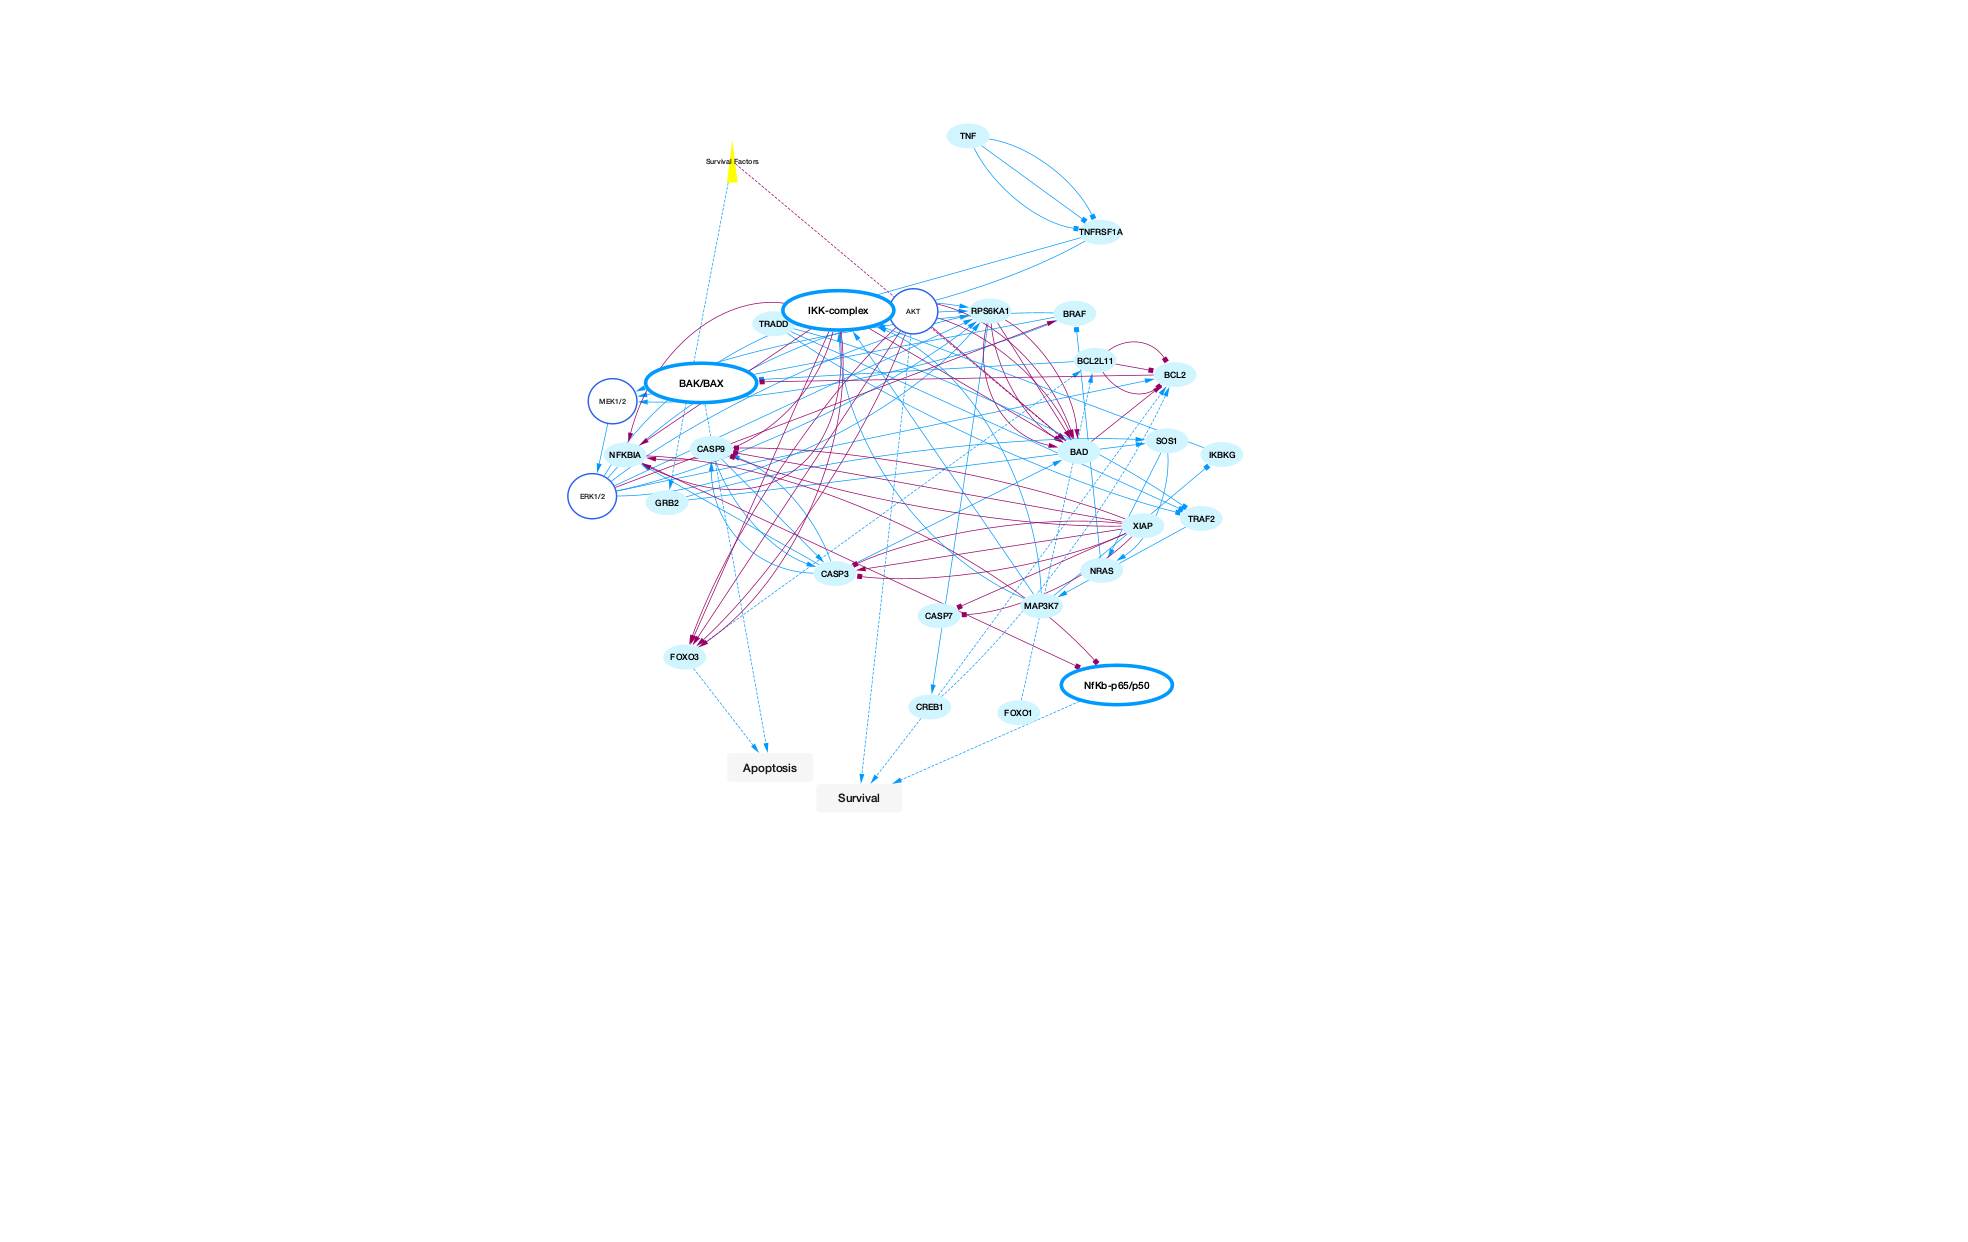

In [2]:
# Inhibition of Apoptosis network exported from Cytoscape
from IPython.display import display, Image
display(Image(filename='Inhibition of Apoptosis.png'))

In [3]:
# Network data exported from Cytoscape
df = pd.read_csv("Inhibition of Apoptosis default edge.csv")

In [4]:
df.head()

,annotator,cell_data,citation,direct,interaction,mechanism,name,notes,residue,selected,sentence,sequence,shared interaction,shared name,tissue_data
0,lperfetto,NaN,pubmed:16243507,True,down-regulates activity,binding,BCL2 (down-regulates activity) BAK/BAX,NaN,NaN,False,Displacement model. BH3-only proteins are prop...,NaN,down-regulates activity,BCL2 (down-regulates activity) BAK/BAX,NaN
1,lperfetto,NaN,pubmed:23567751,False,up-regulates,NaN,BAK/BAX (up-regulates) Apoptosis,NaN,NaN,False,The mitochondrial pathway of apoptosis proceed...,NaN,up-regulates,BAK/BAX (up-regulates) Apoptosis,NaN
2,lperfetto,NaN,pubmed:16243507,True,up-regulates activity,binding,BCL2L11 (up-regulates activity) BAK/BAX,NaN,NaN,False,Letai et al. [ 16] proposed that BH3-only prot...,NaN,up-regulates activity,BCL2L11 (up-regulates activity) BAK/BAX,NaN
3,gcesareni,NaN,pubmed:15694340,True,down-regulates,binding,BCL2L11 (down-regulates) BCL2,NaN,NaN,False,Bim can induce apoptosis by interacting with a...,NaN,down-regulates,BCL2L11 (down-regulates) BCL2,NaN
4,lperfetto,BTO:0000007,pubmed:15694340,True,down-regulates activity,binding,BCL2L11 (down-regulates activity) BCL2,NaN,NaN,False,Apoptosis is initiated when Bcl-2 and its pros...,NaN,down-regulates activity,BCL2L11 (down-regulates activity) BCL2,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   annotator           82 non-null     object
 1   cell_data           42 non-null     object
 2   citation            82 non-null     object
 3   direct              82 non-null     bool  
 4   interaction         82 non-null     object
 5   mechanism           75 non-null     object
 6   name                82 non-null     object
 7   notes               2 non-null      object
 8   residue             26 non-null     object
 9   selected            82 non-null     bool  
 10  sentence            82 non-null     object
 11  sequence            26 non-null     object
 12  shared interaction  82 non-null     object
 13  shared name         82 non-null     object
 14  tissue_data         1 non-null      object
dtypes: bool(2), object(13)
memory usage: 8.6+ KB


In [6]:
# Extract essential data to build the network
essential_col = ['direct','interaction','mechanism','name','sentence']
df_network = df[essential_col].copy()

In [7]:
df_network.head()

,direct,interaction,mechanism,name,sentence
0,True,down-regulates activity,binding,BCL2 (down-regulates activity) BAK/BAX,Displacement model. BH3-only proteins are prop...
1,False,up-regulates,NaN,BAK/BAX (up-regulates) Apoptosis,The mitochondrial pathway of apoptosis proceed...
2,True,up-regulates activity,binding,BCL2L11 (up-regulates activity) BAK/BAX,Letai et al. [ 16] proposed that BH3-only prot...
3,True,down-regulates,binding,BCL2L11 (down-regulates) BCL2,Bim can induce apoptosis by interacting with a...
4,True,down-regulates activity,binding,BCL2L11 (down-regulates activity) BCL2,Apoptosis is initiated when Bcl-2 and its pros...


In [8]:
df['interaction'].unique()

array(['down-regulates activity', 'up-regulates', 'up-regulates activity',
       'down-regulates', 'down-regulates quantity by destabilization',
       'up-regulates quantity by expression',
       'up-regulates quantity by stabilization'], dtype=object)

In [9]:
df['mechanism'].unique()

array(['binding', nan, 'phosphorylation', 'transcriptional regulation',
       'relocalization', 'cleavage', 'guanine nucleotide exchange factor',
       'ubiquitination'], dtype=object)

In [10]:
# To simplify the expression, only 'up-regulates' and 'down-regulates' would be extracted
# to build a boolean network for analysis.
# Interaction mechanism would be ignored.

In [11]:
# Helper functions
def extract_rules(txt):
    if 'up-regulates' in txt:
        return '+'
    elif 'down-regulates' in txt:
        return '-'
    
def find_text(txt1, txt2):
    nodes_list = list()
    string_to_remove = "("+txt1+")"
    a = txt2.replace(string_to_remove,"")
    b, c = a.split()
    return b, c

In [12]:
# Test case
txt1="down-regulates activity" # Interaction
txt2="BCL2 (down-regulates activity) BAK/BAX" #Description of the nodes interaction

In [13]:
print (extract_rules(txt2))
print (find_text(txt1,txt2))

-
('BCL2', 'BAK/BAX')


In [14]:
def network_nodes(txt1, txt2):
    """ to create a array that summarise the interaction """
    interaction_graph = list()
    assert len(txt1)==len(txt2), "incompatible dimension"
    length = len(txt1)
    for i in range(length):
        b, c = find_text(txt1[i],txt2[i])
        interaction_graph.append([b, c, extract_rules(txt1[i])])
    return interaction_graph

In [15]:
# Need to tally "Survival Factors" which should be extracted as one factor
def survival_factors(txt):
    if "Survival Factors" in txt:
        return txt.replace("Survival Factors","Survival_factors")
    return txt

In [16]:
txt = 'Survival Factors is testing'
print(survival_factors(txt))

Survival_factors is testing


In [17]:
df_network['name2']=df_network['name'].apply(survival_factors)

In [18]:
df_network.head()

,direct,interaction,mechanism,name,sentence,name2
0,True,down-regulates activity,binding,BCL2 (down-regulates activity) BAK/BAX,Displacement model. BH3-only proteins are prop...,BCL2 (down-regulates activity) BAK/BAX
1,False,up-regulates,NaN,BAK/BAX (up-regulates) Apoptosis,The mitochondrial pathway of apoptosis proceed...,BAK/BAX (up-regulates) Apoptosis
2,True,up-regulates activity,binding,BCL2L11 (up-regulates activity) BAK/BAX,Letai et al. [ 16] proposed that BH3-only prot...,BCL2L11 (up-regulates activity) BAK/BAX
3,True,down-regulates,binding,BCL2L11 (down-regulates) BCL2,Bim can induce apoptosis by interacting with a...,BCL2L11 (down-regulates) BCL2
4,True,down-regulates activity,binding,BCL2L11 (down-regulates activity) BCL2,Apoptosis is initiated when Bcl-2 and its pros...,BCL2L11 (down-regulates activity) BCL2


In [19]:
txt1=df_network['interaction']
txt2=df_network['name2']
graph = network_nodes(txt1,txt2)
print (len(graph))
graph

82


[['BCL2', 'BAK/BAX', '-'],
 ['BAK/BAX', 'Apoptosis', '+'],
 ['BCL2L11', 'BAK/BAX', '+'],
 ['BCL2L11', 'BCL2', '-'],
 ['BCL2L11', 'BCL2', '-'],
 ['BCL2L11', 'BCL2', '-'],
 ['MAP3K7', 'IKK-complex', '+'],
 ['MAP3K7', 'IKK-complex', '+'],
 ['MAP3K7', 'IKK-complex', '+'],
 ['MAP3K7', 'IKBKG', '+'],
 ['IKK-complex', 'FOXO3', '-'],
 ['IKK-complex', 'FOXO3', '-'],
 ['IKK-complex', 'NFKBIA', '-'],
 ['IKK-complex', 'NFKBIA', '-'],
 ['IKK-complex', 'NFKBIA', '-'],
 ['IKK-complex', 'NFKBIA', '-'],
 ['IKK-complex', 'BAD', '-'],
 ['IKK-complex', 'BAD', '-'],
 ['IKBKG', 'IKK-complex', '+'],
 ['NFKBIA', 'NfKb-p65/p50', '-'],
 ['NFKBIA', 'NfKb-p65/p50', '-'],
 ['NfKb-p65/p50', 'Survival', '+'],
 ['FOXO3', 'Apoptosis', '+'],
 ['FOXO3', 'BCL2L11', '+'],
 ['CREB1', 'Survival', '+'],
 ['CREB1', 'BCL2', '+'],
 ['CREB1', 'BCL2', '+'],
 ['AKT', 'Survival', '+'],
 ['AKT', 'FOXO3', '-'],
 ['AKT', 'FOXO3', '-'],
 ['AKT', 'FOXO3', '-'],
 ['AKT', 'BAD', '-'],
 ['AKT', 'BAD', '-'],
 ['MEK1/2', 'ERK1/2', '+'],
 ['E

In [20]:
# Apparently, there are duplicates in entries. Next step is to remove duplicates.

In [21]:
graph_without_duplicates = list()
for entry in graph:
    if entry not in graph_without_duplicates:
        graph_without_duplicates.append(entry)
    else:
        pass

In [22]:
print (len(graph_without_duplicates))
graph_without_duplicates

44


[['BCL2', 'BAK/BAX', '-'],
 ['BAK/BAX', 'Apoptosis', '+'],
 ['BCL2L11', 'BAK/BAX', '+'],
 ['BCL2L11', 'BCL2', '-'],
 ['MAP3K7', 'IKK-complex', '+'],
 ['MAP3K7', 'IKBKG', '+'],
 ['IKK-complex', 'FOXO3', '-'],
 ['IKK-complex', 'NFKBIA', '-'],
 ['IKK-complex', 'BAD', '-'],
 ['IKBKG', 'IKK-complex', '+'],
 ['NFKBIA', 'NfKb-p65/p50', '-'],
 ['NfKb-p65/p50', 'Survival', '+'],
 ['FOXO3', 'Apoptosis', '+'],
 ['FOXO3', 'BCL2L11', '+'],
 ['CREB1', 'Survival', '+'],
 ['CREB1', 'BCL2', '+'],
 ['AKT', 'Survival', '+'],
 ['AKT', 'FOXO3', '-'],
 ['AKT', 'BAD', '-'],
 ['MEK1/2', 'ERK1/2', '+'],
 ['ERK1/2', 'BCL2', '+'],
 ['ERK1/2', 'BRAF', '-'],
 ['ERK1/2', 'RPS6KA1', '+'],
 ['BRAF', 'MEK1/2', '+'],
 ['Survival_factors', 'GRB2', '+'],
 ['Survival_factors', 'BAD', '-'],
 ['GRB2', 'SOS1', '+'],
 ['CASP3', 'NFKBIA', '+'],
 ['CASP3', 'BAD', '+'],
 ['CASP3', 'CASP9', '+'],
 ['SOS1', 'NRAS', '+'],
 ['TNF', 'TNFRSF1A', '+'],
 ['TNFRSF1A', 'TRADD', '+'],
 ['TRADD', 'TRAF2', '+'],
 ['TRAF2', 'MAP3K7', '+'],
 [

In [23]:
df=pd.DataFrame(graph_without_duplicates,columns=['start_node','end_node','interaction'])

In [24]:
df.to_csv("survival_apoptosis_network.csv",index=False)

In [25]:
df_input = pd.read_csv('survival_apoptosis_network.csv')

In [26]:
df_input.head()

,start_node,end_node,interaction
0,BCL2,BAK/BAX,-
1,BAK/BAX,Apoptosis,+
2,BCL2L11,BAK/BAX,+
3,BCL2L11,BCL2,-
4,MAP3K7,IKK-complex,+


In [27]:
df_input.describe()

,start_node,end_node,interaction
count,44,44,44
unique,28,26,2
top,IKK-complex,BAD,+
freq,3,5,29
